In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
from scipy.stats import norm, uniform, expon
from scipy.integrate import quad
from sympy.solvers import solve
from sympy import Symbol
import numpy as np
from pandas import Series, DataFrame

In [4]:
werte = np.array([0,10,11])
ew = np.sum(werte*1/3)
ew

7.0

In [5]:
var_X = np.sum((werte-ew)**2*1/3)
var_X

24.666666666666664

In [6]:
sd_X = np.sqrt(var_X)

In [13]:
sim = np.random.choice(werte, size=10, replace = True)
sim

array([ 0, 11, 10, 11, 11, 11, 10,  0, 10, 10])

(array([3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Patch objects>)

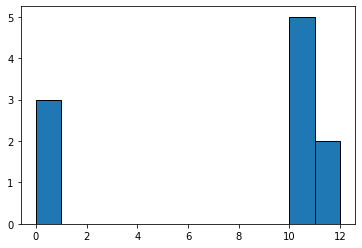

In [17]:
# range: macht die Bins von 0 bis 12 mit Anstand 1
# edgecolor: zeichnet die Balkenumrandungen ein mit
# facecolor kann noch die Farbe der Balken veraendert
# werden
plt.hist(sim, bins = range(0, 13, 1), edgecolor = "black")

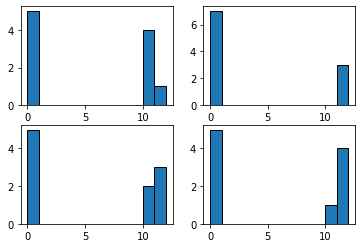

In [18]:
# subplot: Macht 4 subplots mit 2 Reihen und 2 Spalten
# i: der i-te subplot
for i in range(1,5):
    plt.subplot(2,2,i)
    sim = np.random.choice(werte, size=10, replace = True)
    plt.hist(sim, bins=range(0,13,1), edgecolor="black")


In [21]:
sim_1 = np.random.choice(werte,size=10, replace = True)
sim_1
sim_2 = np.random.choice(werte,size=10, replace = True)
sim_2
sim_mean_2 = (sim_1+sim_2)/2
sim_mean_2


array([ 5.5,  5.5,  5. , 10. ,  5.5, 10. ,  5. , 10.5, 10. ,  5.5])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 4., 0., 0., 0., 0., 0.,
        0., 0., 0., 3., 1., 0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5]),
 <a list of 23 Patch objects>)

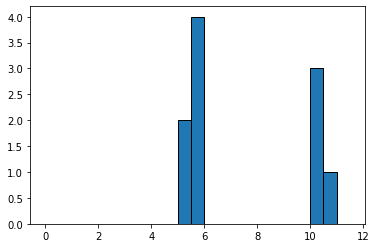

In [22]:
# linspace: Spaltenbreiten 0.5 ueber das Intervall
plt.hist(sim_mean_2, bins = np.linspace(0, 11.5, 24), edgecolor = "black")

In [28]:
sim_1 = np.random.choice(werte,size=10, replace = True)
sim_1
sim_2 = np.random.choice(werte,size=10, replace = True)
sim_2
sim_3 = np.random.choice(werte,size=10, replace = True)
sim_3
sim_mean_3 = (sim_1+sim_2+sim_3)/3
sim_mean_3

array([ 7.        ,  7.33333333, 10.66666667, 10.33333333,  7.33333333,
       11.        , 10.        , 10.66666667,  6.66666667,  3.33333333])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0., 3., 1., 0.]),
 array([ 0.        ,  0.33333333,  0.66666667,  1.        ,  1.33333333,
         1.66666667,  2.        ,  2.33333333,  2.66666667,  3.        ,
         3.33333333,  3.66666667,  4.        ,  4.33333333,  4.66666667,
         5.        ,  5.33333333,  5.66666667,  6.        ,  6.33333333,
         6.66666667,  7.        ,  7.33333333,  7.66666667,  8.        ,
         8.33333333,  8.66666667,  9.        ,  9.33333333,  9.66666667,
        10.        , 10.33333333, 10.66666667, 11.        , 11.33333333]),
 <a list of 34 Patch objects>)

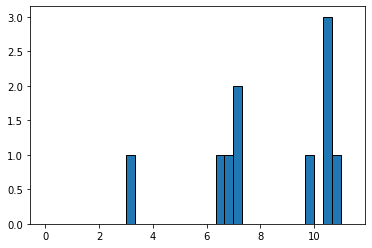

In [29]:
# linspace: Spaltenbreiten 1/3 ueber das Intervall
plt.hist(sim_mean_3, bins = np.linspace(0, 11 + 1/3, 35),
edgecolor = "black")

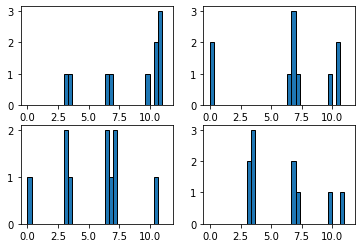

In [35]:
for i in range(1,5):
    plt.subplot(2,2,i)
    sim_1 = np.random.choice(werte,size=10, replace = True)
    sim_2 = np.random.choice(werte,size=10, replace = True)
    sim_3 = np.random.choice(werte,size=10, replace = True)
    sim_mean_3 = (sim_1+sim_2+sim_3)/3
    plt.hist(sim_mean_3,bins=np.linspace(0,11+1/3,35),edgecolor="black")

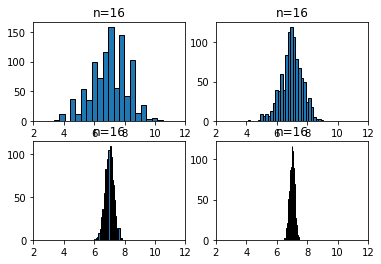

In [52]:
# Code nur fuer n=16
# 1. Subplot mit 2 Reihen und zwei Spalten

n = 1024
i = 1
for n in [16,54,256,1024]:
    plt.subplot(2,2,i)
    # es werden 1000*n zufaellige Zahlen aus werte gezogen
    sim = np.random.choice(werte,1000*n, replace = True)
    # reshape: Vektor wird in eine n x 1000-Matrix umgewandelt (1000 Spalten)
    sim = np.reshape(sim, (n,1000))
    # Mittelwert aller Spalten (axis=0)
    sim_mean = np.mean(sim, axis=0)
    # Festlegung des x-Bereiches (damit die Skizzen miteinander vergleichbar sind)
    plt.xlim(2,12)
    plt.title("n=16")
    plt.hist(sim_mean,edgecolor="black",bins="auto")
    i = i+1

C:\Users\flori\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


(array([0.00820513, 0.02461538, 0.01367521, 0.09299145, 0.00820513,
        0.19418803, 0.01641026, 0.36649573, 0.19965812, 0.31726496,
        0.41025641, 0.16410256, 0.41846154, 0.06290598, 0.2625641 ,
        0.05470085, 0.07931624, 0.0191453 , 0.0191453 , 0.00273504]),
 array([ 3.25    ,  3.615625,  3.98125 ,  4.346875,  4.7125  ,  5.078125,
         5.44375 ,  5.809375,  6.175   ,  6.540625,  6.90625 ,  7.271875,
         7.6375  ,  8.003125,  8.36875 ,  8.734375,  9.1     ,  9.465625,
         9.83125 , 10.196875, 10.5625  ]),
 <a list of 20 Patch objects>)

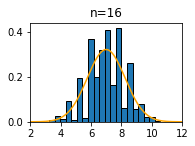

In [71]:
from scipy.stats import norm
plt.subplot(2,2,1)
n = 16
sim = np.reshape(np.random.choice(werte,1000*n, replace = True), (n,1000))
sim_mean = np.mean(sim, axis=0)
plt.xlim(2,12)
plt.title(f"n={n}")
# Festlegung der x-Werte: 500 Werte zwischen 2 und 12
x = np.linspace(2,12,500)
# Berechung der zugehoerigen Funktionswerte
y = norm.pdf(x, loc=7, scale=sd_X/np.sqrt(n))
plt.plot(x,y,color="orange")
#Normierung, dass die Flaeche des Histogrammes 1 ist
plt.hist(sim_mean, edgecolor="black", bins="auto", normed=True)

In [72]:
from scipy.stats import uniform, expon, norm
import math
norm.cdf(x=5100, loc=5000, scale = math.sqrt(2500))

0.9772498680518208

In [73]:
from scipy.stats import uniform, expon, norm, binom
import math
binom.cdf(k=5100, n=10000, p=0.5)

0.9777871004771368